<a href="https://colab.research.google.com/github/EvanMadrigal/FashionMNIST/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#using tensorflow framework
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#getting dataset directly from Kera
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

<function matplotlib.pyplot.show(close=None, block=None)>

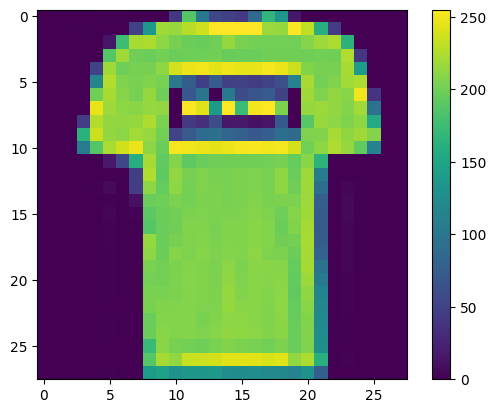

In [10]:
#Processing an image
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show

In [13]:
#Scaling before processing
train_images = train_images / 255
test_images = test_images / 255

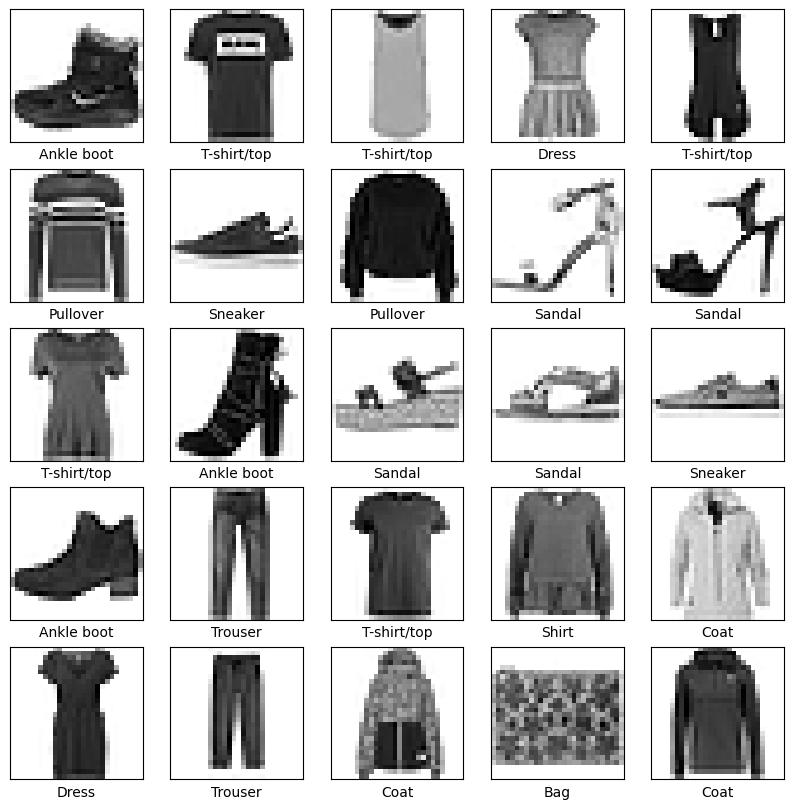

In [14]:
#Verifying format using the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



In [15]:
#Building the models layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [16]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
#Fiting model to training set
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1038 - accuracy: 0.6525
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6417 - accuracy: 0.7700
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5622 - accuracy: 0.7980
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5183 - accuracy: 0.8164
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4905 - accuracy: 0.8273
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4712 - accuracy: 0.8338
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4559 - accuracy: 0.8387
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4443 - accuracy: 0.8445
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4347 - accuracy: 0.8472
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.426

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4529 - accuracy: 0.8372 - 951ms/epoch - 3ms/step

Test accuracy: 0.8371999859809875


In [23]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [24]:
#after training the model we can try to make predicitions
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [25]:
#analyzing predictions confidence
predictions[0]

array([1.0276605e-06, 8.4122220e-08, 7.4079317e-06, 5.4733478e-06,
       1.2100575e-05, 1.3730632e-01, 2.6252506e-05, 2.8550828e-01,
       5.6003560e-03, 5.7153273e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [27]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


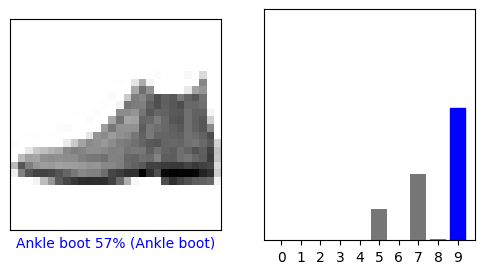

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

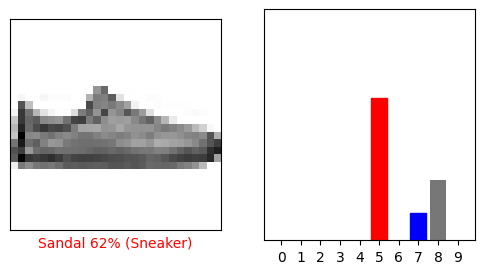

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

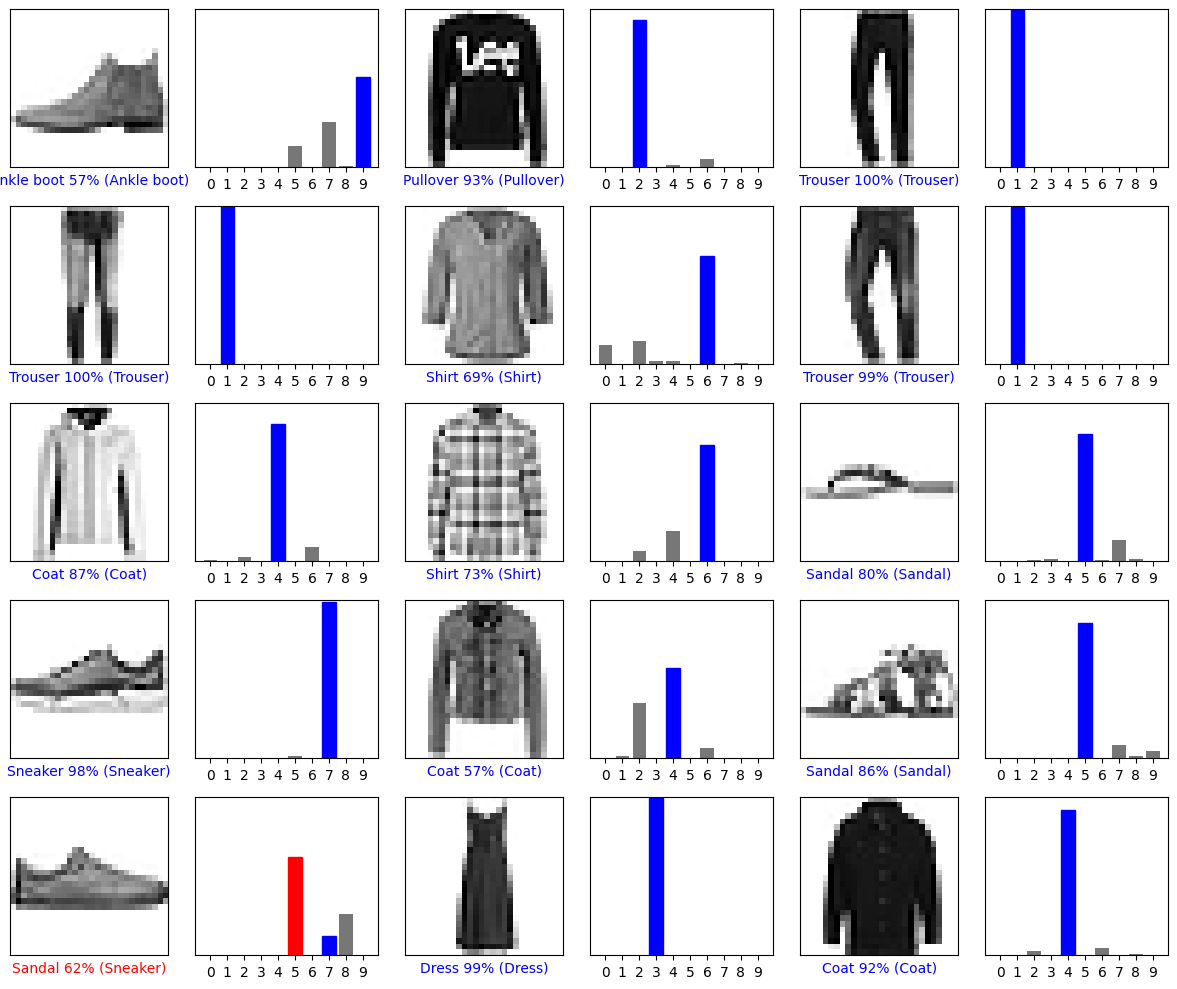

In [32]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [33]:
#using the test dataset I can make predicitions
img = test_images[1]

print(img.shape)

(28, 28)


In [34]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [35]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 33ms/step
[[2.5920471e-04 4.2665220e-06 9.3181109e-01 8.2490922e-05 1.2717456e-02
  2.0579004e-10 5.5002473e-02 2.0843134e-16 1.2306229e-04 8.8591053e-12]]


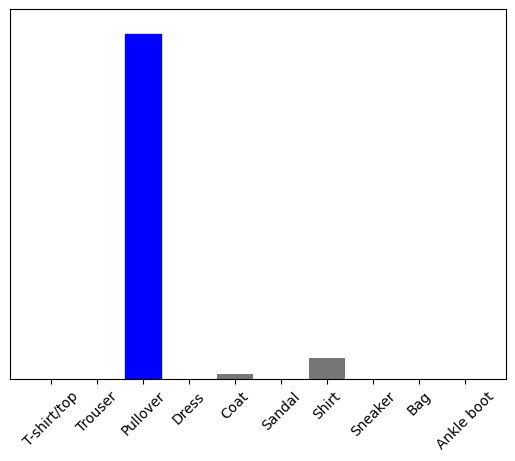

In [36]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [37]:
np.argmax(predictions_single[0])

2